# Neural Network

The neural network is constructed with PyTorch.

In [1]:
import pandas as pd

import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train_encoded.csv")
test = pd.read_csv("test_encoded.csv")

In [3]:
X_train, y_train = train.iloc[:, :-5], train.iloc[:, -5:]
X_test, y_test = test.iloc[:, :-5], test.iloc[:, -5:]

Convert dataframes to tensors.

In [4]:
X_train = torch.tensor(X_train.values)
X_test = torch.tensor(X_test.values)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

Convert them to right types.

In [5]:
X_train = X_train.to(torch.float32)
y_train = y_train.to(torch.float32)

Next initialize the neural network.

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 5),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
learning_rate = 1e-1
epochs = 5

In [8]:
model = NeuralNetwork()

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
epochs = 100
loss_arr = []

for i in range(epochs):
    pred = model(X_train)
    loss = criterion(pred, y_train)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
 
    loss_arr.append(loss.item())
    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')
    

Epoch: 0 Loss: 6.287944316864014
Epoch: 10 Loss: 1.2425487041473389
Epoch: 20 Loss: 1.130942463874817
Epoch: 30 Loss: 1.0037598609924316
Epoch: 40 Loss: 0.9063865542411804
Epoch: 50 Loss: 0.8396981954574585
Epoch: 60 Loss: 0.7852128744125366
Epoch: 70 Loss: 0.7576334476470947
Epoch: 80 Loss: 0.7486205101013184
Epoch: 90 Loss: 0.7334051132202148


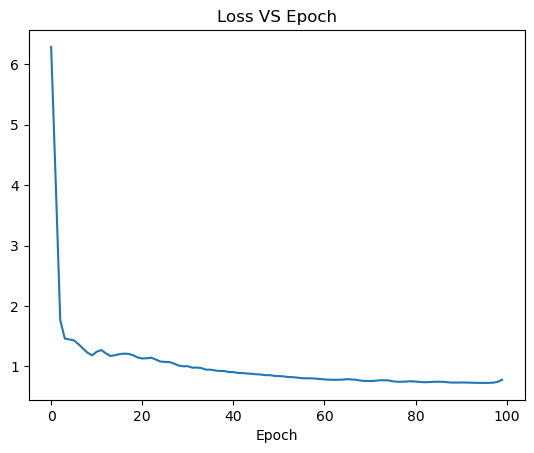

In [11]:
plt.title('Loss VS Epoch')
plt.xlabel("Loss")
plt.xlabel("Epoch")
plt.plot(loss_arr)

In [12]:
X_train.dtype

torch.float32

Now the test set is predicted.

In [13]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model(val.float())
        preds.append(y_hat.argmax().item())

In [14]:
preds

[3,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3]

In [20]:
y_new = y_test.argmax(axis=1).tolist()

In [22]:
df = pd.DataFrame({'Y': y_new, 'Prediction': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['Prediction'])]

In [23]:
df

,Y,Prediction,Correct
0,0,3,0
1,4,4,1
2,3,3,1
3,4,4,1
4,3,3,1
5,1,3,0
6,4,4,1
7,4,4,1
8,3,3,1
9,3,3,1


Get accuracy.

In [24]:
df['Correct'].sum() / len(df)

0.675